In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  


In [8]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv("deliveries_updated_mens_ipl_upto_2024.csv")

# Display the first 5 rows
df.head()


,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18


In [9]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            8381 non-null    float64
 13  isNoBall          1093 non-null    float64
 14  Byes              673 non-null     float64
 15  LegByes           4001 non-null    float64
 16  Penalty           2 

matchId                  0
inning                   0
over_ball                0
over                     0
ball                     0
batting_team             0
bowling_team             0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extras                   0
isWide              252539
isNoBall            259827
Byes                260247
LegByes             256919
Penalty             260918
dismissal_kind      247970
player_dismissed    247970
date                     0
dtype: int64

In [10]:
print(df.columns)


Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date'],
      dtype='object')


In [11]:
df_2024=df[df["date"].str.contains("2024")]

In [12]:
total_matches = df_2024["matchId"].nunique()
print(f"Total Matches in IPL 2024: {total_matches}")


Total Matches in IPL 2024: 71


In [13]:
teams =df_2024["batting_team"].nunique()
print("Teams Participating in IPL 2024:",teams)

Teams Participating in IPL 2024: 10


In [14]:
top_batsmen = df_2024.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)
print(top_batsmen)


batsman
V Kohli            741
RD Gaikwad         583
R Parag            573
TM Head            567
SV Samson          531
B Sai Sudharsan    527
KL Rahul           520
N Pooran           499
SP Narine          488
Abhishek Sharma    484
Name: batsman_runs, dtype: int64


In [15]:
top_bowlers = df_2024[df_2024["dismissal_kind"].notna()]
top_bowlers = top_bowlers.groupby("bowler")["dismissal_kind"].count().sort_values(ascending=False).head(10)
print(top_bowlers)


bowler
HV Patel          30
Mukesh Kumar      22
Avesh Khan        22
JJ Bumrah         21
CV Varun          21
T Natarajan       20
MA Starc          20
Arshdeep Singh    20
Harshit Rana      20
AD Russell        19
Name: dismissal_kind, dtype: int64


In [16]:
df_2024["dismissal_kind"].value_counts()


dismissal_kind
caught                   626
bowled                   123
run out                   52
lbw                       50
caught and bowled         18
stumped                   13
obstructing the field      1
Name: count, dtype: int64

In [17]:
powerplay_runs = df_2024[(df_2024["over"] >= 1) & (df_2024["over"] <= 6)].groupby("batting_team")["batsman_runs"].sum()
print(powerplay_runs)


batting_team
Chennai Super Kings             746
Delhi Capitals                  844
Gujarat Titans                  528
Kolkata Knight Riders           833
Lucknow Super Giants            674
Mumbai Indians                  773
Punjab Kings                    713
Rajasthan Royals                732
Royal Challengers Bengaluru     840
Sunrisers Hyderabad            1045
Name: batsman_runs, dtype: int64


In [18]:
death_overs_runs = df_2024[(df_2024["over"] >= 16) & (df_2024["over"] <= 20)].groupby("batting_team")["batsman_runs"].sum()
print(death_overs_runs)


batting_team
Chennai Super Kings            569
Delhi Capitals                 503
Gujarat Titans                 436
Kolkata Knight Riders          398
Lucknow Super Giants           492
Mumbai Indians                 474
Punjab Kings                   473
Rajasthan Royals               534
Royal Challengers Bengaluru    570
Sunrisers Hyderabad            587
Name: batsman_runs, dtype: int64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


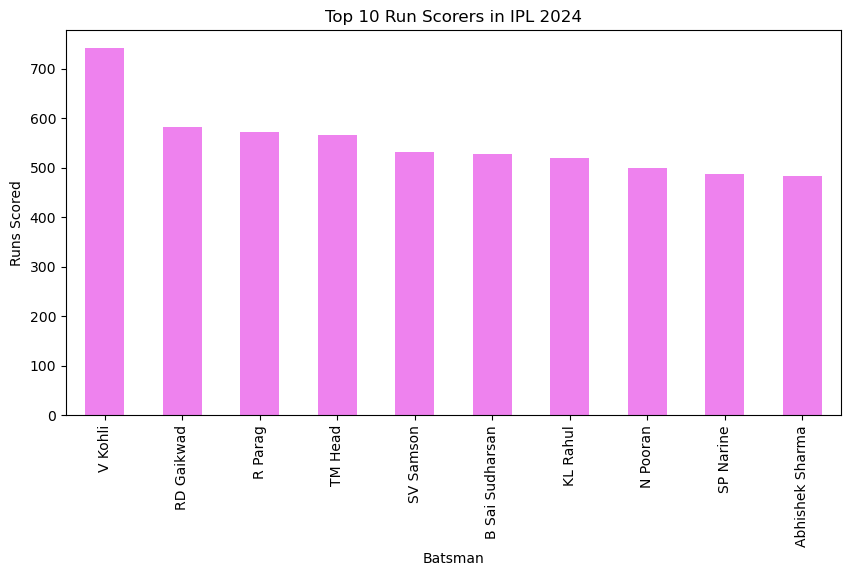

In [23]:
plt.figure(figsize=(10,5))
top_batsmen.plot(kind="bar", color="violet")
plt.xlabel("Batsman")
plt.ylabel("Runs Scored")
plt.title("Top 10 Run Scorers in IPL 2024")
plt.show()


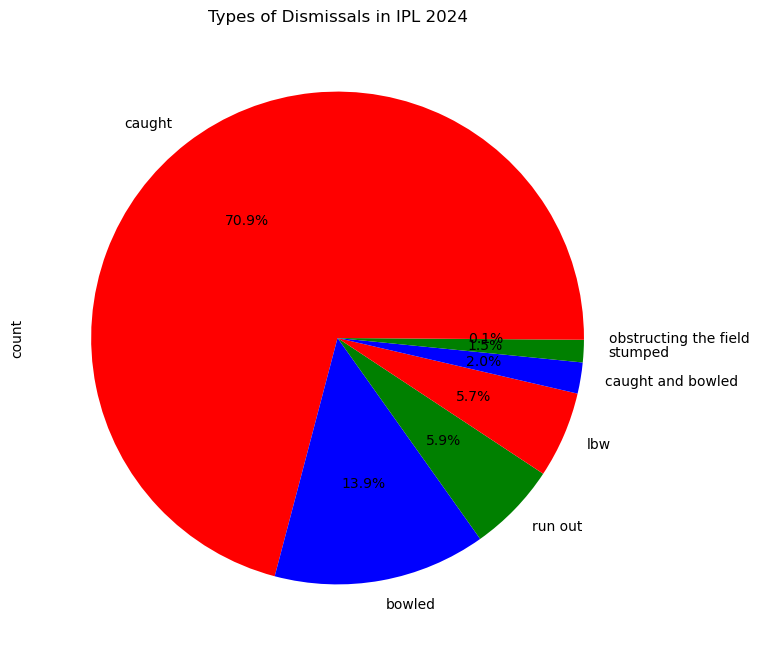

In [58]:
plt.figure(figsize=(8,8))
df_2024["dismissal_kind"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["red", "blue", "green"])
plt.title("Types of Dismissals in IPL 2024")
plt.show()


In [59]:
impact_players = df_2024.groupby("batsman")["batsman_runs"].sum() + df_2024.groupby("bowler")["dismissal_kind"].count()
impact_players = impact_players.sort_values(ascending=False).head(10)
print("Top 10 Impactful Players:", impact_players)


Top 10 Impactful Players: R Parag            573.0
TM Head            567.0
SP Narine          506.0
Abhishek Sharma    486.0
Tilak Varma        416.0
S Dube             397.0
MP Stoinis         393.0
T Stubbs           381.0
VR Iyer            370.0
Shashank Singh     355.0
dtype: float64


In [37]:
df_2024 = df[df['season'] == 2024].copy()  # ✅ This ensures df_2024 is independent
df_2024["ball_faced"] = df_2024.groupby("batsman")["batsman"].transform("count")
df_2024["strike_rate"] = (df_2024["batsman_runs"] / df_2024["ball_faced"]) * 100



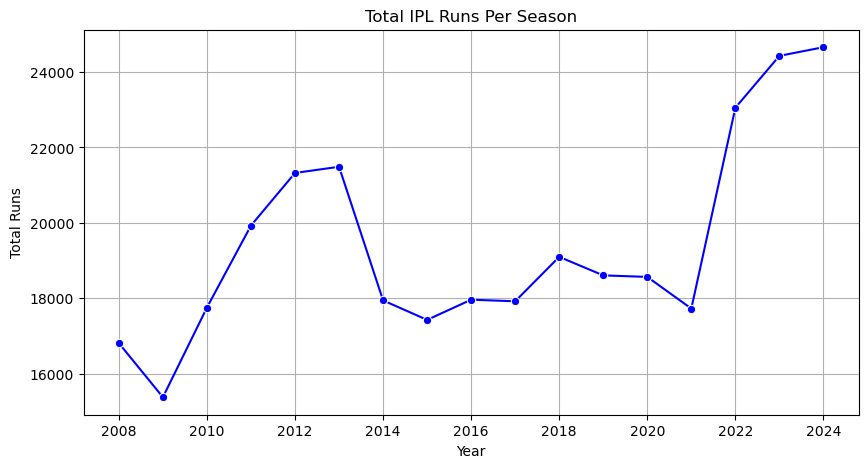

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("deliveries_updated_mens_ipl_upto_2024.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the season (year) from the 'date' column
df['season'] = df['date'].dt.year

# Aggregate total runs per season
season_runs = df.groupby('season')['batsman_runs'].sum()

# Plot Total Runs Per Season
plt.figure(figsize=(10, 5))
sns.lineplot(x=season_runs.index, y=season_runs.values, marker='o', color='blue')
plt.title("Total IPL Runs Per Season")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()


In [25]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("deliveries_updated_mens_ipl_upto_2024.csv")

# Filter only IPL 2024 Data
df["date"] = pd.to_datetime(df["date"])
df_2024 = df[df["date"].dt.year == 2024]

# Streamlit App Layout
st.title("🏏 IPL 2024 Analytics Dashboard")
st.sidebar.header("Filter Options")

# Sidebar Filters
selected_team = st.sidebar.selectbox("Select Team", ["All"] + list(df_2024["batting_team"].unique()))

# Filter Data Based on Selection
if selected_team != "All":
    df_2024 = df_2024[df_2024["batting_team"] == selected_team]

# Total Matches in IPL 2024
st.subheader("📊 IPL 2024 Overview")
st.write(f"**Total Matches:** {df_2024['matchId'].nunique()}")

# Top 10 Batsmen
st.subheader("🏏 Top 10 Run Scorers")
top_batsmen = df_2024.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)
st.bar_chart(top_batsmen)

# Top 10 Bowlers
st.subheader("🎯 Top 10 Wicket-Takers")
top_bowlers = df_2024[df_2024["dismissal_kind"].notna()].groupby("bowler")["dismissal_kind"].count().sort_values(ascending=False).head(10)
st.bar_chart(top_bowlers)

# Strike Rate Analysis
df_2024["balls_faced"] = df_2024.groupby("batsman")["batsman"].transform("count")
df_2024["strike_rate"] = (df_2024["batsman_runs"] / df_2024["balls_faced"]) * 100

st.subheader("⚡ Top 10 Players by Strike Rate")
strike_rate = df_2024.groupby("batsman")["strike_rate"].mean().sort_values(ascending=False).head(10)
st.bar_chart(strike_rate)

# Most Common Dismissals
st.subheader("🔄 Dismissal Types")
fig, ax = plt.subplots()
df_2024["dismissal_kind"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["red", "blue", "green"], ax=ax)
st.pyplot(fig)

# Powerplay & Death Overs Performance
st.subheader("🚀 Powerplay & Death Overs Analysis")
powerplay_runs = df_2024[(df_2024["over"] >= 1) & (df_2024["over"] <= 6)].groupby("batting_team")["batsman_runs"].sum()
death_overs_runs = df_2024[(df_2024["over"] >= 16) & (df_2024["over"] <= 20)].groupby("batting_team")["batsman_runs"].sum()

st.write("**Powerplay Runs (Overs 1-6):**")
st.bar_chart(powerplay_runs)

st.write("**Death Overs Runs (Overs 16-20):**")
st.bar_chart(death_overs_runs)

# Run the Streamlit App (Command: `streamlit run ipl_dashboard.py`)

ModuleNotFoundError: No module named 'streamlit'